# 초기 세팅

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# pandas 설치
!pip install pandas
# numpy 설치
!pip install numpy
# seaborn 설치
!pip install seaborn
# scikit-learn 설치
!pip install scikit-learn
# geopy 설치
!pip install geopy
# XGBoost 설치
!pip install xgboost
# lightGBM 설치
!pip install lightgbm

ERROR: Operation cancelled by user


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,251 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

# 3.2 탐색적 데이터 분석

## 3.2.1 데이터 설명

In [4]:
train = pd.read_csv('/content/gdrive/MyDrive/dacon/3/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/dacon/3/test.csv')
bts = pd.read_csv('/content/gdrive/MyDrive/dacon/3/bus_bts.csv')
jeju_life = pd.read_csv('/content/gdrive/MyDrive/dacon/3/jeju_financial_life_data.csv')
weather = pd.read_csv('/content/gdrive/MyDrive/dacon/3/weather.csv', encoding='euc-kr')
rain = pd.read_csv('/content/gdrive/MyDrive/dacon/3/rain.csv')

In [ ]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [ ]:
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [ ]:
bts.info(null_counts=True)
# info() 명령어를 사용하면 결측ㅊ의 존재여부는 확인할 수 있지만, 설정된 최대 행, 열 표시 개수보다 작을때만 표시된다
# 설정된 최대 변수의 수는 pd.options.display.max_info_columns로 확인할 수 있고
# 최대 행의 수는 pd.options.dsplay.max_info_rows로 확인할 수 있다.
# null_counts=True로 설정하면 변수별 Non-Null의 개수를 알 수 있다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_card_id         2409414 non-null  float64
 1   bus_route_id         2409414 non-null  int64  
 2   vhc_id               2409414 non-null  int64  
 3   geton_date           2409414 non-null  object 
 4   geton_time           2409414 non-null  object 
 5   geton_station_code   2409414 non-null  int64  
 6   geton_station_name   2409365 non-null  object 
 7   getoff_date          1513678 non-null  object 
 8   getoff_time          1513678 non-null  object 
 9   getoff_station_code  1513678 non-null  float64
 10  getoff_station_name  1513639 non-null  object 
 11  user_category        2409414 non-null  int64  
 12  user_count           2409414 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [ ]:
jeju_life.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [ ]:
jeju_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_cd               10422 non-null  int64  
 1   year_month           10422 non-null  int64  
 2   x_axis               10422 non-null  float64
 3   y_axis               10422 non-null  float64
 4   sex                  10422 non-null  int64  
 5   age                  10422 non-null  int64  
 6   job_majorc           10422 non-null  float64
 7   job_smallc           10422 non-null  float64
 8   job_public           10422 non-null  float64
 9   job_profession       10422 non-null  float64
 10  job_self             10422 non-null  float64
 11  job_none             10422 non-null  float64
 12  job_other            10422 non-null  float64
 13  avg_income           10422 non-null  int64  
 14  med_income           10422 non-null  int64  
 15  avg_spend            10422 non-null 

In [ ]:
weather.head()

,날짜,현재일기,현재기온,체감온도,일강수
0,2019-09-01,흐림,26.2,75.0,0
1,2019-09-02,비 끝남,22.5,72.0,25.7
2,2019-09-03,흐림,25.4,77.0,12.1
3,2019-09-04,약한비단속,24.2,75.0,34.3
4,2019-09-05,구름많음,27.6,79.0,0.1


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      46 non-null     object 
 1   현재일기    46 non-null     object 
 2   현재기온    46 non-null     float64
 3   체감온도    46 non-null     float64
 4   일강수     46 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


In [ ]:
rain.head()

,지점,일시,기온(°C),강수량(mm)
0,gosan,2019-09-01,23.916667,0.00
1,gosan,2019-09-02,23.700000,12.10
2,gosan,2019-09-03,23.550000,1.90
3,gosan,2019-09-04,23.533333,12.84
4,gosan,2019-09-05,26.033333,0.00


In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       184 non-null    object 
 1   일시       184 non-null    object 
 2   기온(°C)   184 non-null    float64
 3   강수량(mm)  66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


## 3.2.2 데이터 시각화를 통한 탐색적 데이터 분석

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False) 
# 분석에 문제가 없는 경고 메세지는 숨김
import warnings
warnings.filterwarnings('ignore') 

In [6]:
traindata = train.copy()

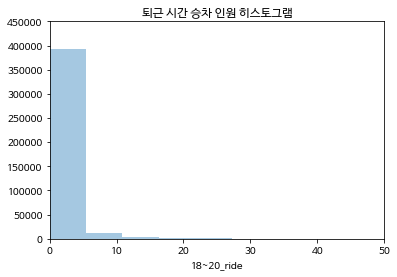

In [ ]:
sns.distplot(traindata['18~20_ride'], kde = False, bins = 50)
plt.axis([0, 50, 0, 450000]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("퇴근 시간 승차 인원 히스토그램") # 그래프 제목 지정
plt.show() # 그래프 그리기

# 구간을 세분화한 결과 퇴근시간 승차인원이 0~5명인 구간에 대부분의 값이 존재
# 0~5 사이에 값이 얼마나 분포되어 있는지 확인

In [ ]:
# 타깃 변수(퇴근 시간 승차 인원) 분포 확인
traindata.groupby('18~20_ride').size().head(6)
# 학습 데이터 타깃 변수의 값 절반 이상이 0이라는 것을 알 수 있음

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

In [ ]:
# 요일 변수 생성

# 날짜형으로 변환
traindata['date'] = pd.to_datetime(traindata['date'])
# 요일을 문자형으로 추출해 변수 생성
traindata['weekday'] = traindata['date'].dt.strftime('%a') #%a -> 축약된 요일명 ex) 월요일(Mon), 화요일(Tue)

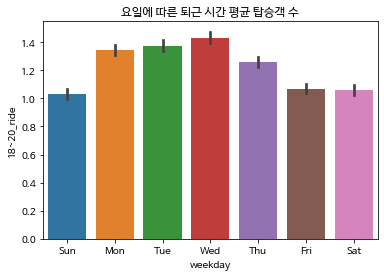

In [ ]:
# 요일별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="weekday", y="18~20_ride", data=traindata)
plt.title("요일에 따른 퇴근 시간 평균 탑승객 수")
plt.show()

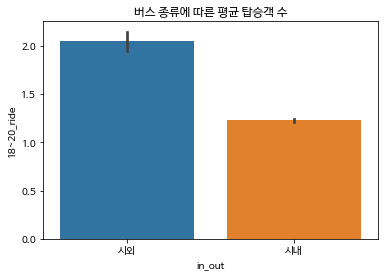

In [ ]:
# 버스 종류별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="in_out", y="18~20_ride", data=traindata)
plt.title("버스 종류에 따른 평균 탑승객 수")
plt.show()

In [8]:
# 일별 출퇴근 시간의 총 승차 인원 데이터 생성
traindata['8~10_ride'] = traindata['8~9_ride'] + traindata['9~10_ride']
eda_data = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum').reset_index()
# 상위 5개 행 확인
eda_data.head()

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0
3,2019-09-04,20133.0,21472.0
4,2019-09-05,20392.0,26331.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

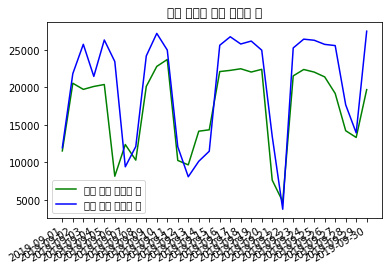

In [10]:
# 일별 출퇴근 시간 탑승객 수 시각화
plt.plot("date", "18~20_ride", "g-", label = "퇴근 시간 탑승객 수", data=eda_data)
plt.plot("date", "8~10_ride", "b-", label = "출근 시간 탑승객 수", data=eda_data)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시
plt.title("일별 출퇴근 시간 탑승객 수")   
plt.show()

# 3.3 데이터 전처리

## 3.3.1 내부 데이터를 통한 변수 생성

In [ ]:
# 학습 데이터와 테스트 데이터를 구분하기 위한 변수 생성
train['cue'] = 0
test['cue'] = 1

# 학습 데이터와 테스트 데이터 통합
df = pd.concat([train, test], axis=0)

In [ ]:
#요일을 나타내는 변수(weekday)

# datetime 변수형으로 변환
df['date'] = pd.to_datetime(df['date'])
# 요일 추출 (0-월요일~6-일요일)
df['weekday'] = df['date'].dt.weekday

In [ ]:
df[['weekday']].head()

,weekday
0,6
1,6
2,6
3,6
4,6


In [ ]:
# 요일별 평균 탑승 승객수를 구하는 함수
def week_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue==0').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 'weekdaymean'변수 생성
    df['weekdaymean'] = 1

    # 각 요일에 해당하는 인덱스 추출
    index0 = df.query('weekday==0').index
    index1 = df.query('weekday==1').index
    index2 = df.query('weekday==2').index
    index3 = df.query('weekday==3').index
    index4 = df.query('weekday==4').index
    index5 = df.query('weekday==5').index
    index6 = df.query('weekday==6').index

    # 인덱스를 활용하여 'weekdaymean'의 값을 각 요일에 맞는 평균 탑승 승객수로 변경 
    df.iloc[index0,-1] = train_data.query('weekday==0')['18~20_ride'].mean()
    df.iloc[index1,-1] = train_data.query('weekday==1')['18~20_ride'].mean()
    df.iloc[index2,-1] = train_data.query('weekday==2')['18~20_ride'].mean()
    df.iloc[index3,-1] = train_data.query('weekday==3')['18~20_ride'].mean()
    df.iloc[index4,-1] = train_data.query('weekday==4')['18~20_ride'].mean()
    df.iloc[index5,-1] = train_data.query('weekday==5')['18~20_ride'].mean()
    df.iloc[index6,-1] = train_data.query('weekday==6')['18~20_ride'].mean()
    return df

# 함수를 실행하여 변수 생성
df = week_mean()

In [ ]:
df[['weekdaymean']].head()

,weekdaymean
0,1.034282
1,1.034282
2,1.034282
3,1.034282
4,1.034282


In [ ]:
# 버스 종류별 평균 탑승 승객수를 구하는 함수
def inout_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue==0').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 in_out_mean 변수 생성
    df['in_out_mean'] = 1

    # 버스 종류별 인덱스 추출
    in_index = df.query('in_out == "시내"').index # 시내버스
    out_index = df.query('in_out == "시외"').index # 시외버스

    # 인덱스를 활용하여 in_out_mean의 값을 각 버스 종류에 맞는 
    # 평균 탑승 승객수로 변경
    df.iloc[in_index,-1] = train_data.query('in_out == "시내"')['18~20_ride'].mean()
    df.iloc[out_index,-1] = train_data.query('in_out == "시외"')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = inout_mean()

In [ ]:
df[['in_out_mean']].head()

,in_out_mean
0,2.044345
1,2.044345
2,2.044345
3,1.228499
4,1.228499


In [ ]:
# 날짜별 오전시간에 탑승한 총 승객수
f=df.groupby('date')['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride'].sum().reset_index()

# 변수명 바꾸기
f.columns=['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum','10~11_ride_sum']

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, f, how='left', on='date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
df[['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum','10~11_ride_sum']].head()

,date,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum
0,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
1,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
2,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
3,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
4,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0


In [ ]:
# 탑승 날짜를 datetime형으로 변환
bts['geton_time2'] = pd.to_datetime(bts['geton_time'])

# 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호 기준으로 정렬
f = bts.sort_values(by=['geton_date','geton_station_code','bus_route_id','geton_time2'],ascending=True).reset_index()

In [ ]:
# 반복문 실행 시간이 많이 소요되어 상태 진행률을 확인할 수 있는 tqdm 라이브러리 사용
from tqdm import notebook

# 시차를 넣기 위한 빈 리스트 생성
interval_lst = []
for i in notebook.tqdm(range(0,len(f)-1)):
    # 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 같다면
    if ((f.iloc[i].geton_date == f.iloc[i+1].geton_date) & 
        (f.iloc[i].geton_station_code == f.iloc[i+1].geton_station_code) & 
        (f.iloc[i].bus_route_id == f.iloc[i+1].bus_route_id)):
        # 탑승 날짜의 차를 interval_lst에 넣기
        interval_lst.append(f.iloc[i+1].geton_time2 - f.iloc[i].geton_time2)
    else:
       # 같지 않다면 0을 interval_lst에 넣기
        interval_lst.append(0)

interval_lst.insert(0, '0')

  0%|          | 0/2409413 [00:00<?, ?it/s]

In [ ]:
f['interval'] = interval_lst # interval_lst를 'interval'변수로 생성 
# 'interval' 변수의 값을 문자형으로 변환 후 '시:분:초'의 형태로 변환
f['interval'] = f['interval'].astype(str).str[7:].replace('','00:00:00')
f['bus_route_id'] = f['bus_route_id'].astype(object)

In [ ]:
# 분으로 변환하는 함수
def get_min(time_str):
    h, m, s = time_str.split(':')
    return (int(h) * 3600 + int(m) * 60 + int(s)) / 60
# 'interval' 함수의 모든 값에 대해 함수 적용하여 나온 값을 time리스트에 넣기
time = []
for i in f['interval'] :
    time.append(get_min(i))

f['time'] = time # time리스트를 'time' 변수로 생성
f['time'] = f['time'].astype(int) # 'time' 변수를 int 타입으로 변경
f = f[f['time'] > 3] # 간격이 3분보다 작은 것 제외 
f = f[f['time'] < 180] # 간격이 3시간보다 큰 것 제외

In [ ]:
# 버스 노선별 버스 간격의 평균 'bus_interval’변수 생성
data = f.groupby('bus_route_id')['time'].agg([('bus_interval', 'mean')]).reset_index()
data['bus_interval'] = data['bus_interval'].astype(int)

# 변수 생성에 많은 시간이 소요되므로 csv 파일로 저장
data.to_csv('bus_interval.csv', index = False)

In [ ]:
# csv 파일이 성공적으로 저장됐다면 다음 과정부터 진행
import numpy as np
df['bus_route_id'] = df['bus_route_id'].astype(np.int64)
bus_interval = pd.read_csv("/content/gdrive/MyDrive/dacon/3/bus_interval.csv")

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, bus_interval, how = 'left', on = 'bus_route_id')
df['bus_interval'] = df['bus_interval'].fillna(9999) # 병합 중 생기는 NA값 처리

In [ ]:
df[['bus_interval']].head()

,bus_interval
0,34.0
1,34.0
2,34.0
3,34.0
4,34.0


In [ ]:
# school 변수 생성

# 정류장명에 '고등학교'가 포함되어 있는 행 뽑기 
highschool_station = df[df['station_name'].str.contains('고등학교')]
# '고등학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
highschool = list(highschool_station['station_name'].unique())
# 정류장명에 '대학교'가 포함되어 있는 행 뽑기
university_station = df[df['station_name'].str.contains('대학교')]
# '대학교'가 포함되어 있는 정류장명을 중복 없이 리스트에 저장
university = list(university_station['station_name'].unique())

# '고등학교'와 '대학교' 근처 정류장 구분 함수
def schoolstation(x):
    # highschool 리스트에 정류장명이 포함되어 있다면 1을 반환
    if x in highschool:
        return 1
    # university 리스트에 정류장명이 포함되어 있다면 1을 반환
    elif x in university:
        return 1
    # 둘 다 포함되지 않는 정류장명이라면 0을 반환
    else:
        return 0

# 모든 정류장명에 대해 적용
df['school'] = df['station_name'].apply(schoolstation) 

In [ ]:
df[['school']].head()

,school
0,0
1,0
2,0
3,0
4,0


In [ ]:
# school 변수와 동일한 방법으로 transfer 변수 생성
transfer_station = df[df['station_name'].str.contains('환승')]
transfers = list(transfer_station['station_name'].unique())

airport_station = df[df['station_name'].str.contains('공항')]
airport = list(airport_station['station_name'].unique())

terminal_station = df[df['station_name'].str.contains('터미널')]
terminal = list(terminal_station['station_name'].unique())

# 항상 수요가 많은 정류장 구분 함수
def transfer_station(x):
    if x in transfers:
        return 1
    elif x in airport:
        return 1
    elif x in terminal:
        return 1
    else:
        return 0

df['transfer'] = df['station_name'].apply(transfer_station)

In [ ]:
df[['transfer']].head()

,transfer
0,0
1,0
2,0
3,1
4,0


In [ ]:
# 날짜에서 연휴 구분 함수
def holiday(x):
    # 공휴일이라면 1을 반환
    if x in ['2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09']:
        return 1
    else:
        # 공휴일이 아니라면 0을 반환
        return 0

    # 모든 날짜에 적용
df['holiday'] = df['date'].apply(holiday)
df[['holiday']].head()

,holiday
0,0
1,0
2,0
3,0
4,0


In [ ]:
# 오전 시간대에 2시간 동안 승차한 인원수의 합계
df['68a'] = df['6~7_ride'] + df['7~8_ride'] 
df['810a'] = df['8~9_ride'] + df['9~10_ride']
df['1012a'] = df['10~11_ride'] + df['11~12_ride']

# 오전 시간대에 2시간 동안 하차한 인원수의 합계
df['68b'] = df['6~7_takeoff'] + df['7~8_takeoff'] 
df['810b'] = df['8~9_takeoff'] + df['9~10_takeoff']
df['1012b'] = df['10~11_takeoff'] + df['11~12_takeoff']

In [ ]:
df[['68a', '810a', '1012a', '68b', '810b', '1012b']].head()

,68a,810a,1012a,68b,810b,1012b
0,1.0,7.0,8.0,0.0,0.0,0.0
1,5.0,6.0,11.0,0.0,0.0,0.0
2,2.0,2.0,0.0,0.0,0.0,0.0
3,17.0,32.0,30.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 오전 시간(6시~12시)에 승차한 승객 수의 합계
df['ride_sum'] = df[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride']].sum(axis=1)

# 오전 시간(6시~12시)에 하차한 승객 수의 합계
df['takeoff_sum'] = df[['6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff','10~11_takeoff', '11~12_takeoff']].sum(axis=1)

In [ ]:
df[['ride_sum', 'takeoff_sum']].head()

,ride_sum,takeoff_sum
0,16.0,0.0
1,22.0,0.0
2,4.0,0.0
3,79.0,0.0
4,0.0,1.0


In [ ]:
# 'bus_route_id'와 'station_code'를 결합해 route_station 생성
df['route_station'] = df['bus_route_id'].astype(str) + ',' + df['station_code'].astype(str)

# 버스노선별 오전시간의 총 승객수와 평균 승객수 구하기
data = df.groupby(['route_station'])['1012a'].agg({'sum', 'mean'}).reset_index()

# 변수명을 route_station, 1012a_mean, 1012a_sum으로 바꾸기
data.rename(columns = {'mean':'1012a_mean', 'sum':'1012a_sum'}, inplace=True)

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, data, how='left', on='route_station')

In [ ]:
df[['1012a_mean','1012a_sum']].head()

,1012a_mean,1012a_sum
0,5.304348,244.0
1,11.608696,534.0
2,2.304348,106.0
3,36.673913,1687.0
4,0.564103,22.0


In [ ]:
# 카테고리별 승객 수의 합
def category_people():
    # df와 병합을 위해 bus_route_id의 타입을 str로 변환
    bts['bus_route_id'] = bts['bus_route_id'].astype(str)

    # bus_route_id와 user_category별 승객 수의 합
    f = bts.groupby(
        ['bus_route_id','user_category']
    )['user_count'].agg([('승객수', 'sum')]).reset_index()

    # bus_route_id별 user_category 변수의 승객수의 피벗 테이블 형태로 변환
    g = pd.pivot_table(f, values='승객수', index='bus_route_id', 
                       columns='user_category', fill_value=0).reset_index()
    g.columns = ['bus_route_id', 'adult','kids','teen','elder','jang','jang2',
                 'ugong','ugong2']
    print(g)
    g = g[['bus_route_id', 'adult','kids','teen','elder']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, g, how='left', on='bus_route_id')
                 
    return merge_data

# bus_route_id의 타입을 str로 통일시켜준 뒤, 함수를 실행하여 변수 생성
df['bus_route_id'] = df['bus_route_id'].astype(str)
df = category_people()

    bus_route_id  adult  kids  teen  elder  jang  jang2  ugong  ugong2
0       17010000    160     0     0      0     0      0      0       0
1       20010000   1406   118   337   1212   160    167     21       0
2       20020000     12     1     0     10     0      2      0       0
3       20040000    561     6     8     33     1      7      0       0
4       20050000    230     0     0    177     6     41      3       0
..           ...    ...   ...   ...    ...   ...    ...    ...     ...
625      4280000  10813   122    51      0     0      0      0       0
626      7990000    189     6    39    422     4     11      1       1
627      8170000   2986     7    19      0     0      0      0       0
628      8180000   5201    22    25      0     0      0      0       0
629      8880000     20     0    25      2     0      2      0       0

[630 rows x 9 columns]


In [ ]:
df[['adult','kids','teen','elder']].head()

,adult,kids,teen,elder
0,8158.0,72.0,38.0,0.0
1,8158.0,72.0,38.0,0.0
2,8158.0,72.0,38.0,0.0
3,8158.0,72.0,38.0,0.0
4,8158.0,72.0,38.0,0.0


In [ ]:
# 카테고리별 승객 비율
def category_people_ratio() :

    # bus_route_id별 user_category의 전체 합
    f_all = bts.groupby('bus_route_id'
                       )['user_count'].agg([('전체', 'sum')]).reset_index()

   # bus_route_id와 user_category별 승객 수의 합
    f_sum = bts.groupby(['bus_route_id','user_category']
                       )['user_count'].agg([('승객수', 'sum')]).reset_index()
    
    # 승객 수의 합을 전체 합으로 나눠줘 비율을 구함
    data = pd.merge(f_all, f_sum, on='bus_route_id')
    data['비율'] = data['승객수'] / data['전체']

   # 피벗 테이블을 통해 bus_route_id별 user_category변수의 승객 비율 형태로 변환
    data = pd.pivot_table(data, values='비율', index='bus_route_id', 
                          columns='user_category',fill_value=0).reset_index()
    data.columns = ['bus_route_id', 'adult_prop','kids_prop','teen_prop',
                    'elder_prop','jang_prop','jang2_prop','ugong_prop','ugong2_prop']
    f = data[['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, f, how='left', on='bus_route_id')

    return merge_data

# 함수를 실행하여 변수 생성
df = category_people_ratio()

In [ ]:
df[['adult_prop','kids_prop','teen_prop','elder_prop']].head()

,adult_prop,kids_prop,teen_prop,elder_prop
0,0.986696,0.008708,0.004596,0.0
1,0.986696,0.008708,0.004596,0.0
2,0.986696,0.008708,0.004596,0.0
3,0.986696,0.008708,0.004596,0.0
4,0.986696,0.008708,0.004596,0.0


In [ ]:
# 연속형 변수의 결측치를 평균값으로 처리할 수 있도록 SimpleImputer를 사용
from sklearn.impute import SimpleImputer  

# SimpleImputer를 사용할 변수 추출
na_col = ['adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 'teen_prop',
          'elder_prop']
# 평균값으로 결측치 처리를 위해 strategy옵션을 mean으로 설정 
imputer = SimpleImputer(strategy="mean")
# 각 변수에 대해 평균값을 구하고 결측치 대치를 위해 fit_transform을 사용
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

In [ ]:
import geopy.distance

coords_jejusi = (33.500770, 126.522761) # 제주시의 위도 경도
coords_seoquiposi = (33.259429, 126.558217) # 서귀포시의 위도 경도

# 제주시와의 거리
df['dis_jejusi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusi).km for i in range(len(df))]
# 서귀포시와의 거리
df['dis_seoquiposi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_seoquiposi).km for i in range(len(df))]

In [ ]:
df[['dis_jejusi', 'dis_seoquiposi']].head()

,dis_jejusi,dis_seoquiposi
0,2.954920,26.256744
1,3.720275,26.403025
2,5.036124,25.893305
3,2.864166,27.997494
4,29.040353,13.574693


In [ ]:
# 승차 인원 상위 10개의 버스정류장 좌표
coords_jejusicheong1 = (33.49892, 126.53035) # 제주시청(광양 방면)의 위도 경도
coords_jejuairport = (33.50661, 126.49345) # 제주국제공항(구제주 방면)의 위도 경도
coords_hallahosp = (33.48963, 126.486) # 한라병원의 위도 경도
coords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도
coords_jejucenterhigh = (33.48902, 126.5392) # 제주중앙여자고등학교의 위도 경도
coords_jejumarket = (33.51315, 126.52706) # 동문시장의 위도 경도
coords_jejusclass = (33.47626, 126.48141) # 제주고등학교/중흥S클래스의 위도 경도
coords_centerroad = (33.51073, 126.5239) # 중앙로(국민은행)의 위도 경도
coords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도
coords_law = (33.49363, 126.53476) # 제주지방법원(광양 방면)의 위도 경도

# 승차 인원 상위 10개의 버스정류장 좌표와 각 정류장의 지구 표면에서 두 점 사이의 거리를 구함
df['dis_jejusicheong1'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(df))]
df['dis_jejuairport'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejuairport).km for i in range(len(df))]
df['dis_hallahosp'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_hallahosp).km for i in range(len(df))]
df['dis_rotary'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_rotary).km for i in range(len(df))]
df['dis_jejucenterhigh'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejucenterhigh).km for i in range(len(df))]
df['dis_jejumarket'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejumarket).km for i in range(len(df))]
df['dis_jejusclass'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_jejusclass).km for i in range(len(df))]
df['dis_centerroad'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_centerroad).km for i in range(len(df))]
df['dis_fiveway'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_fiveway).km for i in range(len(df))]
df['dis_law'] = [geopy.distance.geodesic((df['latitude'].iloc[i],
    df['longitude'].iloc[i]), coords_law).km for i in range(len(df))]

In [ ]:
df[['dis_jejusicheong1', 'dis_jejuairport', 'dis_hallahosp', 'dis_rotary',
    'dis_jejucenterhigh', 'dis_jejumarket', 'dis_jejusclass', 'dis_centerroad',
    'dis_fiveway', 'dis_law']].head()

,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law
0,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351
1,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172
2,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420
3,3.596334,0.127071,1.889890,1.639020,4.718848,3.311940,3.432034,2.967079,2.376926,4.149595
4,29.106917,28.818039,26.819826,27.283840,28.424280,30.466215,25.277182,30.112554,26.384623,28.724248


# 3.3.2 외부 데이터를 통한 변수 생성

In [ ]:
# 측정소별 위도, 경도
jeju = (33.51411, 126.52969) # 제주 측정소 근처
gosan = (33.29382, 126.16283) # 고산 측정소 근처
seongsan = (33.38677, 126.8802) # 성산 측정소 근처
po = (33.24616, 126.5653) # 서귀포 측정소 근처

# 버스정류장과 제주 측정소와의 거리
t1 = [geopy.distance.geodesic((i,j), jeju).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_jeju'] = t1

# 버스정류장과 고산 측정소와의 거리
t2 = [geopy.distance.geodesic((i,j), gosan).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_gosan']=t2

# 버스정류장과 성산 측정소와의 거리
t3 = [geopy.distance.geodesic((i,j), seongsan).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_seongsan']=t3

# 버스정류장과 서귀포 측정소와의 거리
t4 = [geopy.distance.geodesic((i,j), po).km
      for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_po']=t4

In [ ]:
df[['dis_jeju', 'dis_gosan', 'dis_seongsan', 'dis_po']].head()

,dis_jeju,dis_gosan,dis_seongsan,dis_po
0,4.286659,37.692766,37.713630,27.841879
1,4.966848,37.008492,38.465822,27.996179
2,6.330746,35.642126,39.259820,27.496551
3,3.575272,38.643401,38.386802,29.579404
4,30.652098,23.648361,45.899140,14.269792


In [ ]:
total = pd.DataFrame(list(zip(t1,t2,t3,t4)),
                     columns=['jeju', 'gosan', 'seongsan', 'po'])
df['dist_name'] = total.apply(lambda x: x.idxmin(), axis=1)

In [ ]:
df[['dist_name']].head()

,dist_name
0,jeju
1,jeju
2,jeju
3,jeju
4,po


In [ ]:
# 변수명 변경 
# ['지점', '일시', '기온(°C)', '강수량(mm)']
rain.columns = ['dist_name', 'date', 'temperature', 'rainfall']

# fillna 함수를 활용해 결측치를 0으로 치환
rain = rain.fillna(0)

# rain 데이터의 date 변수를 datetime 형태로 변환
rain['date'] = pd.to_datetime(rain['date'])

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, rain, how='left', on=['dist_name', 'date'])

In [ ]:
df[['temperature', 'rainfall']].head()

,temperature,rainfall
0,24.650000,0.0
1,24.650000,0.0
2,24.650000,0.0
3,24.650000,0.0
4,23.783333,0.0


In [ ]:
def is_rainy(x):
    if x == 0:
        return 0 # 비 안오는 날
    else:
        return 1 # 비 오는 날

df['rainy_day'] = df['rainfall'].apply(is_rainy)

In [ ]:
df[['rainy_day']].head()

,rainy_day
0,0
1,0
2,0
3,0
4,0


In [ ]:
# df 주소 데이터(df_location.csv) 로드
df_loc = pd.read_csv("/content/gdrive/MyDrive/dacon/3/df_location.csv", encoding='cp949')[['location','dong', 'si']]
# jeju_life 주소 데이터(life_location.csv) 로드
life_loc = pd.read_csv("/content/gdrive/MyDrive/dacon/3/life_location.csv", encoding='cp949'
                      )[['location','dong', 'si']]

# df의 위도, 경도 변수를 문자열로 취급하여 location 변수 생성
df['location'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)
# jeju_life의 위도, 경도 변수를 문자열로 취급하여 location 변수 생성
jeju_life['location'] = jeju_life['y_axis'].astype(str).str[:10] + ',' + \
                        jeju_life['x_axis'].astype(str).str[:10]

# location 변수를 기준으로 df와 df_loc 병합
df = pd.merge(df, df_loc, how='left', on='location')
# location 변수를 기준으로 jeju_life와 life_loc 병합
jeju_life = pd.merge(jeju_life, life_loc, how='left', on='location')

In [ ]:
jeju_life['x_axis'].astype(str).str[:10]

0        126.565889
1        126.497120
2        126.497120
3        126.497120
4        126.497120
            ...    
10417    126.531404
10418    126.665089
10419    126.426762
10420    126.665089
10421    126.665089
Name: x_axis, Length: 10422, dtype: object

In [ ]:
df[['location', 'dong', 'si']].head()

,location,dong,si
0,"33.4899,126.49373",연동,제주시
1,"33.48944,126.48508",연동,제주시
2,"33.48181,126.47352",노형동,제주시
3,"33.50577,126.49252",용담이동,제주시
4,"33.255790000000005,126.4126",색달동,서귀포시


In [ ]:
col = ['job_majorc', 'job_smallc', 'job_public', 'job_profession', 'job_self', 
       'avg_income', 'med_income', 'avg_spend', 'vehicle_own_rat']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 평균을 구함
data1 = jeju_life.groupby(['dong'])[col].mean().reset_index()
data1.columns=['dong','mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
               'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat',
               'mean_avg_income', 'mean_med_income', 'mean_avg_spend']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 합계를 구함 
data2 = jeju_life.groupby(['dong'])[col].sum().reset_index()
data2.columns=['dong','sum_job_majorc', 'sum_job_smallc', 'sum_job_public', 
               'sum_job_profession', 'sum_job_self', 'sum_vehicle_own_rat', 
               'sum_avg_income', 'sum_med_income', 'sum_avg_spend']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 비율을 구함
data3 = (jeju_life.groupby(['dong'])[col].sum() \
             / jeju_life.groupby(['dong'])[col].sum().sum()).reset_index()
data3.columns = ['dong','rate_job_majorc', 'rate_job_smallc', 'rate_job_public', 
                 'rate_job_profession', 'rate_job_self', 'rate_vehicle_own_rat', 
                 'rate_avg_income', 'rate_med_income', 'rate_avg_spend']

# dong을 기준으로 기존의 데이터프레임에 새로운 변수를 병합
merge_data1 = pd.merge(data1, data2, how='left', on='dong')
merge_data2 = pd.merge(merge_data1, data3, how='left', on='dong')
df = pd.merge(df, merge_data2, how='left', on='dong')

In [ ]:
df[['mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
    'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat', 
    'mean_avg_income', 'mean_med_income', 'mean_avg_spend']].head()

,mean_job_majorc,mean_job_smallc,mean_job_public,mean_job_profession,mean_job_self,mean_vehicle_own_rat,mean_avg_income,mean_med_income,mean_avg_spend
0,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514
1,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514
2,0.032494,0.154253,0.042997,0.020755,0.139257,3.678985e+07,3.265628e+07,5.128032e+06,0.035210
3,0.025593,0.167158,0.035757,0.014249,0.135443,3.076244e+07,2.891900e+07,4.000557e+06,0.029785
4,0.035615,0.178596,0.019174,0.004394,0.305618,3.498224e+07,3.017862e+07,4.115050e+06,0.044791


In [ ]:
df[['sum_job_majorc', 'sum_job_smallc', 'sum_job_public', 
    'sum_job_profession', 'sum_job_self', 'sum_vehicle_own_rat', 
    'sum_avg_income', 'sum_med_income', 'sum_avg_spend']].head()

,sum_job_majorc,sum_job_smallc,sum_job_public,sum_job_profession,sum_job_self,sum_vehicle_own_rat,sum_avg_income,sum_med_income,sum_avg_spend
0,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112
1,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112
2,19.918703,94.556852,26.357053,12.723008,85.364807,2.255218e+10,2.001830e+10,3.143484e+09,21.583853
3,6.244585,40.786531,8.724751,3.476796,33.048145,7.506035e+09,7.056235e+09,9.761358e+08,7.267512
4,1.032846,5.179291,0.556057,0.127439,8.862915,1.014485e+09,8.751800e+08,1.193365e+08,1.298941


In [ ]:
df[['rate_job_majorc', 'rate_job_smallc', 'rate_job_public', 
    'rate_job_profession', 'rate_job_self', 'rate_vehicle_own_rat', 
    'rate_avg_income', 'rate_med_income', 'rate_avg_spend']].head()

,rate_job_majorc,rate_job_smallc,rate_job_public,rate_job_profession,rate_job_self,rate_vehicle_own_rat,rate_avg_income,rate_med_income,rate_avg_spend
0,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458
1,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458
2,0.074411,0.063195,0.077104,0.081449,0.038947,0.062667,0.062396,0.071018,0.053445
3,0.023328,0.027259,0.025523,0.022257,0.015078,0.020857,0.021994,0.022053,0.017995
4,0.003858,0.003461,0.001627,0.000816,0.004044,0.002819,0.002728,0.002696,0.003216


In [ ]:
# 새로 생성한 27개의 변수 정보
df[merge_data2.columns[1:]].info() # 새로 생성한 27개 변수 각각 201개의 NA값이 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643593 entries, 0 to 643592
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mean_job_majorc       641868 non-null  float64
 1   mean_job_smallc       641868 non-null  float64
 2   mean_job_public       641868 non-null  float64
 3   mean_job_profession   641868 non-null  float64
 4   mean_job_self         641868 non-null  float64
 5   mean_vehicle_own_rat  641868 non-null  float64
 6   mean_avg_income       641868 non-null  float64
 7   mean_med_income       641868 non-null  float64
 8   mean_avg_spend        641868 non-null  float64
 9   sum_job_majorc        641868 non-null  float64
 10  sum_job_smallc        641868 non-null  float64
 11  sum_job_public        641868 non-null  float64
 12  sum_job_profession    641868 non-null  float64
 13  sum_job_self          641868 non-null  float64
 14  sum_vehicle_own_rat   641868 non-null  float64
 15  

In [ ]:
# 결측치를 평균값으로 처리할 수 있도록 SimpleImputer를 사용
imputer = SimpleImputer(strategy="mean")

# 결측치가 존재하는 변수 목록
na_col = list(merge_data2.columns[1:])

# 각 변수에 대해 평균값을 구하고 결측치 대치를 위해 fit_transform을 사용
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

In [ ]:
# NA값 확인
df[na_col].isnull().sum()

mean_job_majorc         0
mean_job_smallc         0
mean_job_public         0
mean_job_profession     0
mean_job_self           0
mean_vehicle_own_rat    0
mean_avg_income         0
mean_med_income         0
mean_avg_spend          0
sum_job_majorc          0
sum_job_smallc          0
sum_job_public          0
sum_job_profession      0
sum_job_self            0
sum_vehicle_own_rat     0
sum_avg_income          0
sum_med_income          0
sum_avg_spend           0
rate_job_majorc         0
rate_job_smallc         0
rate_job_public         0
rate_job_profession     0
rate_job_self           0
rate_vehicle_own_rat    0
rate_avg_income         0
rate_med_income         0
rate_avg_spend          0
dtype: int64

# 3.3.3 추가 변수 생성

In [ ]:
# 오전시간대에 3시간동안 승차한 인원수의 합계
df['69a'] = df['6~7_ride'] + df['7~8_ride'] + df['8~9_ride']
df['912a']= df['9~10_ride'] + df['10~11_ride'] + df['11~12_ride']

# 오전시간대에 3시간동안 하차한 인원수의 합계
df['69b'] = df['6~7_takeoff'] + df['7~8_takeoff'] + df['8~9_takeoff']
df['912b'] = df['9~10_takeoff'] + df['10~11_takeoff'] + df['11~12_takeoff']

In [ ]:
df[['69a', '912a', '69b', '912b']].head()

,69a,912a,69b,912b
0,3.0,13.0,0.0,0.0
1,9.0,13.0,0.0,0.0
2,2.0,2.0,0.0,0.0
3,23.0,56.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [ ]:
# 변수명 변경
# ['날짜', '현재일기', '현재기온', '체감온도', '일강수']
weather.columns = ['date','description','temp','feels_like','rain']
weather['rain'] = weather['rain'].replace(' ', '0')
weather['rain'] = weather['rain'].astype(float)
weather['date'] = pd.to_datetime(weather['date'])
df = pd.merge(df, weather, how='left', on='date')

In [ ]:
df[['description', 'temp', 'feels_like', 'rain']].head()

,description,temp,feels_like,rain
0,흐림,26.2,75.0,0.0
1,흐림,26.2,75.0,0.0
2,흐림,26.2,75.0,0.0
3,흐림,26.2,75.0,0.0
4,흐림,26.2,75.0,0.0


In [ ]:
def id_statistic(ID, col1, col2) :
    
    train_data = df.query('cue==0').reset_index()    

    # mean, sum
    rs_mean = train_data.groupby([ID])['18~20_ride'].agg([(col1, 'mean')]
                                                        ).reset_index()
    rs_sum = train_data.groupby([ID])['18~20_ride'].agg([(col2, 'sum')]
                                                       ).reset_index()
    rs_mean_sum = pd.merge(rs_mean, rs_sum, on=ID)

    # merge
    merge_data = pd.merge(df, rs_mean_sum, how='left', on=ID)

    # 연속형 변수의 결측치를 평균값으로 대체
    merge_data[col1] = merge_data[col1].fillna(rs_mean[col1].mean())
    merge_data[col2] = merge_data[col2].fillna(rs_sum[col2].mean())
    
    return merge_data


df = id_statistic('bus_route_id', '1820_r_mean', '1820_r_sum')
df = id_statistic('station_code', '1820_s_mean', '1820_s_sum')
df = id_statistic('weekday', '1820_w_mean', '1820_w_sum')
df = id_statistic('route_station', '1820_rs_mean', '1820_rs_sum')

In [ ]:
df[['1820_r_mean', '1820_r_sum', '1820_s_mean', '1820_s_sum',
   '1820_w_mean', '1820_w_sum', '1820_rs_mean', '1820_rs_sum']].head()

,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,1820_rs_mean,1820_rs_sum
0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,1.466667,44.0
1,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5.366667,161.0
2,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,1.600000,48.0
3,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,53.766667,1613.0
4,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,0.153846,4.0


In [ ]:
# sklearn라이브러리에서 라벨 인코딩 객체 불러와서 저장하기
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# 라벨 인코딩 할 변수 선택
df_encode = df[['description', 'bus_route_id','station_code']]
# fit_transform을 통해 라벨 인코딩 
df_encoded = df_encode.apply(labelencoder.fit_transform)

df['description'] = df_encoded['description']
df['bus_route_id2'] = df_encoded['bus_route_id']
df['station_code2'] = df_encoded['station_code']

In [ ]:
df[['description', 'bus_route_id2', 'station_code2']].head()

,description,bus_route_id2,station_code2
0,9,625,322
1,9,625,335
2,9,625,408
3,9,625,1448
4,9,625,1510


# 3.3.4 라벨 인코딩과 원핫 인코딩 변수

In [ ]:
df['in_out'] = df['in_out'].map({'시내':0, '시외':1})

In [ ]:
df[['in_out']].head()

,in_out
0,1
1,1
2,1
3,0
4,0


In [ ]:
def is_weekend(x):
    if x == 5: # 토요일
        return 1
    elif x == 6: # 일요일
        return 1
    else:
        return 0
# 'weekday’변수에 is_weekend함수를 적용하여 'weekend' 변수 생성      
df['weekend'] = df['weekday'].apply(is_weekend)

In [ ]:
df[['weekend']].head()

,weekend
0,1
1,1
2,1
3,1
4,1


In [ ]:
labelencoder = LabelEncoder()

# 라벨 인코딩 할 변수 선택
df_encode = df[['si', 'dong']]
# fit_transform을 통해 라벨 인코딩 
df_encoded = df_encode.apply(labelencoder.fit_transform)

df['si']=df_encoded['si']
df['dong']=df_encoded['dong']

In [ ]:
df[['si', 'dong']].head()

,si,dong
0,1,36
1,1,36
2,1,5
3,1,47
4,0,26


In [ ]:
df = pd.get_dummies(df, columns=['weekday', 'dist_name'])

In [ ]:
df[['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
    'weekday_4', 'weekday_5', 'weekday_6']].head()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [ ]:
df[['dist_name_gosan','dist_name_jeju','dist_name_po','dist_name_seongsan']].head()

,dist_name_gosan,dist_name_jeju,dist_name_po,dist_name_seongsan
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [ ]:
df.shape

(643593, 131)